# 1. Definición del problema 🎯

El **dataset** que utilizaremos es de **Kaggle**, un gran lugar para conseguir **datasets** para tus estudios en Ciencia de Datos e Inteligencia Artificial

El **dataset** es sobre una recolección de datos de personas en Ads de Redes Sociales y de las cuales tiene variables como su edad, género, salario estimado, etc. Puedes descargarlo [aquí](https://www.kaggle.com/rakeshrau/social-network-ads) en **Kaggle**. El objetivo de este **dataset** es **clasificar** a las personas de manera predictiva quiénes compraron o no el producto, nuestra **hipótesis** es que no sabemos apriori cómo se relacionan esas variables y de ser acertada la **hipótesis**, qué tan cierta puede llegar a serla

# 2. Preparación de los datos 💿 🧑🏻‍💻

## 2.1 configuración inicial 👨🏻‍💻

In [ ]:
# Core
import pandas as pd
from pandas import Timestamp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import *

# Validación
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [ ]:
# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:,.2f}'.format

# Ignore Warnings
warnings.filterwarnings('ignore')

## 2.2 Obtención de los datos 💿💻

In [ ]:
# Cargamos nuestro dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/Social_Network_Ads.csv')
dataset.head()

# Creamos una copia del dataset
data = dataset

## 2.3 Limpieza de los datos 📁🧹

In [ ]:
# Dimensionamos
data.shape

(400, 5)

In [ ]:
# Tipos de variables del dataset
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
# Datos faltantes
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## 2.4 Transformación de variables categóricas

In [ ]:
"""
1. Transformamos el Género a una variable binaria
2. Renombramos la columna a su nombre original
"""

data = pd.get_dummies(data, columns = ["Gender"], drop_first = True)
data = data.rename(columns={'Gender_Male':'Gender'})

Para hacer una **clasificación** el modelo necesita información en números, por esta razón convertimos el género en un tipo de variable **binaria**

In [ ]:
# Segmentamos las edades de las personas y le damos una etiqueta
"""
0 ~ 11 años = 1
12 ~ 18 años = 2
19 ~ 35 años = 3
36 ~ 60 años = 4
61 ~ 100 años = 5
"""

bins = [0, 12, 18, 35, 60, 100]
names = ["1","2","3","4","5"]

data["Age"] = pd.cut(data["Age"], bins, labels = names)

**Segmentamos** en rangos de edades para que nuestro modelo trabaje de mejor manera con los datos

In [ ]:
# Downcasteamos
data['EstimatedSalary'] = pd.to_numeric(data['EstimatedSalary'], downcast='float')
data['User ID'] = pd.to_numeric(data['User ID'], downcast='float')
data['Purchased'] = pd.to_numeric(data['Purchased'], downcast='integer')

In [ ]:
# Observamos los cambios
data.dtypes

User ID             float32
Age                category
EstimatedSalary     float32
Purchased              int8
Gender                uint8
dtype: object

# 3. Análisis exploratorio de los datos 🔎👾

## 3.1 Resumen estadístico 📄📈

In [ ]:
# Resumen de nuestro dataset
data.describe()

,User ID,EstimatedSalary,Purchased,Gender
count,400.00,400.00,400.00,400.00
mean,"15,691,540.00","69,742.50",0.36,0.49
std,"71,658.32","34,096.96",0.48,0.50
min,"15,566,689.00","15,000.00",0.00,0.00
25%,"15,626,763.75","43,000.00",0.00,0.00
50%,"15,694,341.50","70,000.00",0.00,0.00
75%,"15,750,363.00","88,000.00",1.00,1.00
max,"15,815,236.00","150,000.00",1.00,1.00


In [ ]:
"""
1. Para conocer las cantidades de mujeres y hombres
2. 204 mujeres y 196 hombres
"""

data['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

Más mujeres compran la diferencia no es muy grande, pero es algo a tener en cuenta

In [ ]:
"""
1. Para conocer las cantidades de personas que compraron y que no lo hicieron
2. No lo hicieron 257 personas y si lo hicieron 143 personas
"""

data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

Esta información es crucial, saber que solo un porcentaje de personas se decidieron por comprar basado en interacciones de Redes Sociales es algo interesante de saber

## 3.2 Diagramas de frecuencia 📊

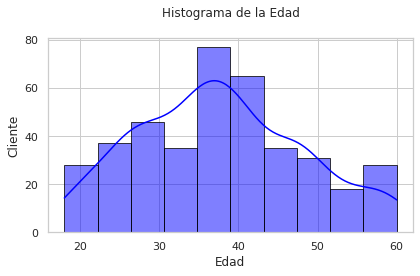

In [ ]:
# Histplot
%matplotlib inline
sns.set_theme(style='whitegrid')
sns.histplot(data=dataset, x='Age', color='blue', linewidth=0.75, edgecolor='black', kde=True)
plt.title("Histograma de la Edad\n")
plt.xlabel("Edad")
plt.ylabel("Cliente")
plt.tight_layout();

### Análisis del Histplot 🔎📊

Podemos notar algo sumamente importante el rango de edad de personas que más compran se encuentran aproximádamente entre los $40$ a $45$ años, tiene un poco de lógica porque es una edad en el que las personas tienen **solvencia económica** y probablemente se vean atrapados por sus preferencias a la hora de tomar una decisión, y las personas muy jóvenes o muy mayores se ven desinteresados de comprar seguramente por la falta de **músculo financiero**

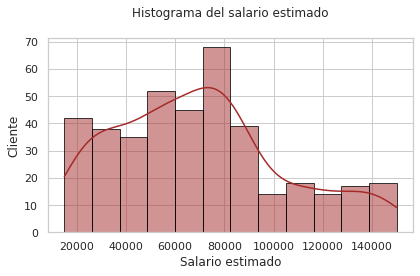

In [ ]:
# Histplot
%matplotlib inline
sns.set_theme(style='whitegrid')
sns.histplot(data=dataset, x='EstimatedSalary', linewidth=0.75, color='brown', edgecolor='black', kde=True)
plt.title("Histograma del salario estimado\n")
plt.xlabel("Salario estimado")
plt.ylabel("Cliente")
plt.tight_layout();

### Análisis del Histplot 🔎📊

Podemos observar que existe una **distribución** no tan normal, se cumple un poco lo que ocurría con el rango de edad de las personas, los que menos ganan porque son muy jóvenes no tienen capacidad de comprar por distintos motivos personales, por otra parte las personas que más ganan tampoco les interesa mucho comprar los productos, puede ser debido a que no se trata de algo "exclusivo" y sean productos para clases media por así decirlo

## 3.3 Matriz de Correlación

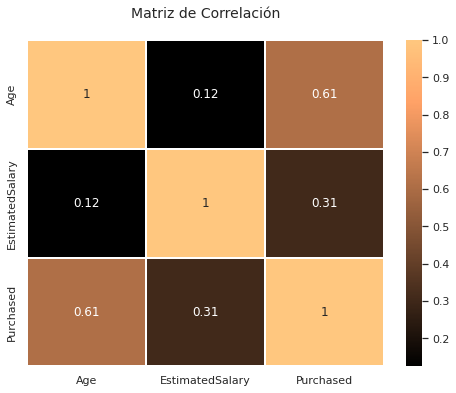

In [ ]:
# Correlation Matrix
matriz_corr = dataset[['Age','EstimatedSalary','Purchased']].corr(method='spearman')

# Heatmap
plt.subplots(figsize=(8,6))
plt.title('Matriz de Correlación\n', fontsize=14)
sns.heatmap(matriz_corr, annot=True, linewidths=1.5, cmap=sns.color_palette("copper", as_cmap=True));

### Análisis de la Matriz de Correlación 🔢😳

Podemos observar que existe una **correlación** considerablemente aceptable entre `Age` y `Purchased` al parecer se cumple la regla de que la edad influye al momento de efectuar una compra en este tipo de mercado

## 3.4 Diagrama de dispersión ☁📈

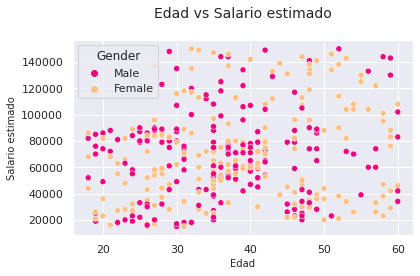

In [ ]:
# Scatterplot
sns.set_theme(style="darkgrid")
plt.subplot(1,1,1)
sns.scatterplot(data=dataset, x='Age', y='EstimatedSalary', palette='Accent_r', alpha=1, hue='Gender')
plt.title('Edad vs Salario estimado\n', fontsize=14)
plt.xlabel('Edad',fontsize=10)
plt.ylabel('Salario estimado',fontsize=10)
plt.tight_layout();

### Análisis del Scatterplot 📈🔍

Hay mucha **dispersión** y la **correlación** es nula entre estos dos **features**, lo único que podemos concluir es que tantos hombres y mujeres tienen comportamientos similares tomando como referencia esos **features**

## 3.5 Selección de features y de target 👉🏻💯

In [ ]:
# Definimos nuestros features y target
X = data.drop(['User ID','Purchased'], axis=1)
y = data['Purchased']

Tomamos los **features** que nos interesan y definimos nuestra variable **target**

In [ ]:
"""
1. Hacemos Cross Validation a nuestros datos de entrenamiento y test por medio de Stratified K-Fold
2. Printeamos para saber si la distribución fue la correcta
"""

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf.get_n_splits(X,y)

for train, test in skf.split(X,y):

    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]


display(f'Datos de entrenamiento de X: {len(X_train)}')
display(f'Datos de prueba de X: {len(X_test)}')
display(f'Datos de entrenamiento de Y: {len(y_train)}')
display(f'Datos de prueba de Y: {len(y_test)}')

'Datos de entrenamiento de X: 360'

'Datos de prueba de X: 40'

'Datos de entrenamiento de Y: 360'

'Datos de prueba de Y: 40'

Realizamos **Stratified K-Fold** para que nuestros datos se encuentren lo más **barajados** posible para que el modelo trate de generalizar lo más que pueda y no caigamos en situación de **overfitting** 

# 4. Modelamiento 🧠🤖

In [ ]:
# Importamos nuestro estimador
from sklearn.ensemble import RandomForestClassifier

## 4.1 Selección del modelo 👉🏻🤖

In [ ]:
# Estimador
clf = RandomForestClassifier()

## 4.2 Entrenamiento del modelo 🦾🤖

In [ ]:
# Entrenamos el estimador
clf.fit(X_train, y_train)

RandomForestClassifier()

## 4.3 Predicción del modelo 📈📉

In [ ]:
# Predicción del estimador
print('\t\t\tPredicción del modelo')
y_pred = clf.predict(X_test)
y_pred

			Predicción del modelo


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int8)

En esta matriz podemos observar la **predicción** del modelo basado en los datos con los que se entrenó, ahora pasaremos a evaluarlo para ver cómo responde

# 5. Evaluación del modelo 💻🤖

## 5.1 Cross Validation 🔀💻

In [ ]:
# Hacemos validación cruzada con nuestro modelo
resultados = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1_macro').mean()
display(f'Cross Validation del modelo: {resultados*100:.2f}%')

'Cross Validation del modelo: 81.53%'

Realizamos **Cross Validation** con nuestro modelo y nos damos cuenta que obtuvo un buen **performance**

In [ ]:
"""
1. Importamos nuestras métricas
2. Evaluamos el modelo con un Accuracy Score
"""

# Métricas
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import metrics

# Accuracy Score
accuracy = clf.score(X_test, y_test)
display(f'Acuracy Score del modelo: {accuracy*100:.2f}%')

'Acuracy Score del modelo: 90.00%'

Al validar los resultados con el **Accuracy Score** confirmamos lo antes mencionado

## 5.2 Optimización paramétrica 🔣🤖

In [ ]:
# Grilla de Parámetros
array = list(range(2,11))
array2 = list(range(4,11))

parameters = {'max_depth': array,
              'n_estimators': array2,
              'criterion': ['gini','entropy']}

Creamos una **grilla** de **parámetros** para tunear nuestro modelo para ver si le podemos hacer mejoras a este

In [ ]:
"""
1. Entrenamos nuestro clasificador con validación cruzada y los parámetros conseguidos
2. Tomamos la media de la combinación de modelos
3. Utilizamos el mejor modelo obtenido
"""

clf_cv = GridSearchCV(clf, parameters, cv=skf, n_jobs=-1, scoring='f1_macro')
clf_cv = clf_cv.fit(X_train, y_train)
clf_cv.cv_results_['mean_test_score']
best_model = clf_cv.best_estimator_

Al hacer varios procesos iterativos conseguimos los mejores **parámetros** y lo almacenamos como nuestro `best_model` 

In [ ]:
# Hacemos validación cruzada con nuestro mejor modelo y sacamos la media de la validación cruzada

scores = cross_val_score(best_model, X_train, y_train, cv=skf, scoring='f1_macro').mean()
display(f'Cross Validation del modelo optimizado: {scores*100:.2f}%')

'Cross Validation del modelo optimizado: 85.49%'

Al hacer nuevamente **Cross Validation** pero con nuestro nuevo **modelo parametrizado** conseguimos un **Accuraccy Score** más bajo pero seguramente con mejor **performance** en el que probablemente no sufrirá de **overfitting**

In [ ]:
# Accuracy Score

accuracy2 = clf_cv.score(X_test, y_test)
display(f'Acuracy Score del modelo optimizado: {accuracy2*100:.2f}%')

'Acuracy Score del modelo optimizado: 91.61%'

Confirmamos los resultados de nuestro **modelo optimizado** con un mejor **Accuracy Score** que el anterior

## 5.3 Predicción optimizada 📈📉

In [ ]:
# Predicción optimizada
print('\t\t\tPredicción del modelo')
y_pred_cv = best_model.predict(X_test)
display(y_pred_cv)

			Predicción del modelo


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int8)

Realizamos nuevamente la **predicción** con el **nuevo modelo**

## 5.4 Matriz de Confusión 🔢😵

In [ ]:
# Matriz de confusión sin Optimización
cnf_matrix_clf = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix_clf

array([[24,  1],
       [ 3, 12]])

Para finalizar con la **validación** de nuestro **modelo** haremos una **Matriz de Confusión** para ver cómo se comportaron los datos de **prueba** con los de **predicción** y ante un posible escenario en el que haya ingesta de datos el modelo pueda **generalizar** de la mejor forma

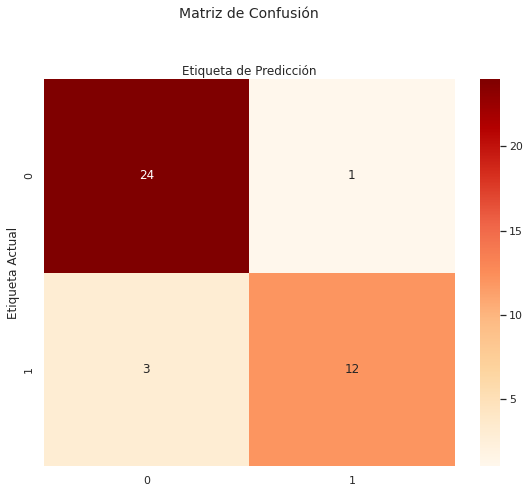

In [ ]:
# Definimos las etiquetas de nuestra Matriz de confusión
class_names = [0,1]
fig,ax = plt.subplots(figsize=(8,7)) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) 

# Creamos nuestra Matriz de confusión
sns.heatmap(pd.DataFrame(cnf_matrix_clf), annot = True, cmap='OrRd', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Matriz de Confusión\n', y=1.1, fontsize=14)
plt.ylabel('Etiqueta Actual', fontsize=12)
plt.xlabel('Etiqueta de Predicción', fontsize=12)
plt.tight_layout();

In [ ]:
# Matriz de confusión sin Optimización
cnf_matrix_clf_cv = metrics.confusion_matrix(y_test,y_pred_cv)
cnf_matrix_clf_cv

array([[25,  0],
       [ 3, 12]])

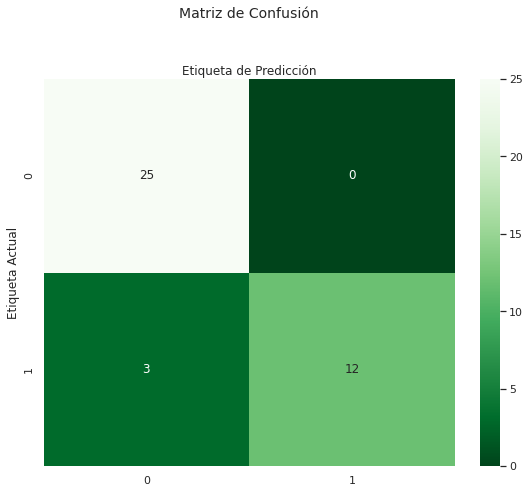

In [ ]:
# Definimos las etiquetas de nuestra Matriz de confusión
class_names = [0,1]
fig,ax = plt.subplots(figsize=(8,7)) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) 

# Creamos nuestra Matriz de confusión
sns.heatmap(pd.DataFrame(cnf_matrix_clf_cv), annot = True, cmap='Greens_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Matriz de Confusión\n', y=1.1, fontsize=14)
plt.ylabel('Etiqueta Actual', fontsize=12)
plt.xlabel('Etiqueta de Predicción', fontsize=12)
plt.tight_layout();

### Análisis de las Matrices de Confusión

Como podemos notar son muy parecidos los resultados, sin embargo es más probable que la segunda tenga mejor **precisión** con los resultados, ya que se tomaron las medidas para que se consiguiera el **mejor modelo** dentro de una combinación de **permutaciones** posibles al tratar de mejorarlo.

**Resultados**

- _Verdaderos Positivos_: 24
- _Verdaderos Negativos_: 13
- _Falsos Positivos_: 1
- _Falsos Negativos_: 2

# 6. Conclusiones 📋🖊

- Llevamos a cabo un estudio con la **técnica de EDA (Exploratory Data Analysis)**.
- Las **visualizaciones** mostradas en los gráficos dijeron cosas muy apropiadas que fueron relevantes. 
- La **Matriz de Correlaciones** mostró un patrón de manera más marcada.
- Obtuvimos excelentes performance con **Cross Validation** del 81,39% y 84,66% sin parametrizar y parametrizado respectivamente.
- Nuestro **clasificador parametrizado** resultó ser más **robusto** y nos condujo a un mejor escenario.
- Nuestros Scores mejoraron con la parametrización, pasamos de 90% a 91.89% con una tasa de variación de 2% en **precisión**.

# 7. Trabajo finalizado 📄✔

![link text](https://media.giphy.com/media/fDzM81OYrNjJC/source.gif?cid=ecf05e471mkgebs0ci5cquqshmfeg7fbpcbmws5rspjgh31e&rid=source.gif&ct=g)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>